<a href="https://colab.research.google.com/github/eun-88/DataScientist_07/blob/main/%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
2.0.2


In [2]:
import os

# 1. 최상위 디렉토리 생성
root_path = '/content/rock_scissor_paper'

# 2. 하위 클래스 디렉토리 목록
sub_dirs = ['rock', 'scissor', 'paper']

for sub_dir in sub_dirs:
    # 각 경로 생성 (content/rock_scissor_paper/rock 등)
    path = os.path.join(root_path, sub_dir)

    # 해당 경로가 없으면 생성
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"디렉토리 생성 완료: {path}")
    else:
        print(f"이미 존재하는 디렉토리입니다: {path}")

디렉토리 생성 완료: /content/rock_scissor_paper/rock
디렉토리 생성 완료: /content/rock_scissor_paper/scissor
디렉토리 생성 완료: /content/rock_scissor_paper/paper


In [3]:
# 가위(scissor) 압축 풀기
!unzip -q /content/rock_scissor_paper/scissor/scissor.zip -d /content/rock_scissor_paper/scissor
# 바위(rock) 압축 풀기
!unzip -q /content/rock_scissor_paper/rock/rock.zip -d /content/rock_scissor_paper/rock
# 보(paper) 압축 풀기
!unzip -q /content/rock_scissor_paper/paper/paper.zip -d /content/rock_scissor_paper/paper

print("모든 압축 해제가 완료되었습니다!")

모든 압축 해제가 완료되었습니다!


In [4]:
!rm /content/rock_scissor_paper/scissor/scissor.zip
!rm /content/rock_scissor_paper/rock/rock.zip
!rm /content/rock_scissor_paper/paper/paper.zip

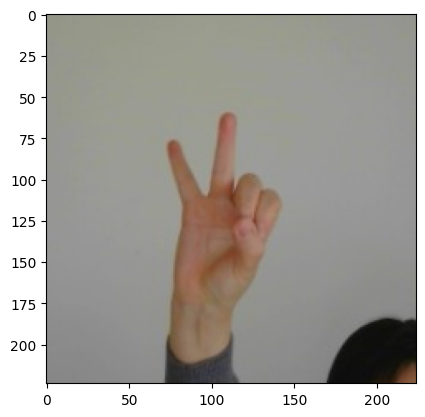

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 가위 폴더의 첫 번째 이미지 확인 (파일명은 실제와 다를 수 있으니 확인 필요)
sample_img_path = "/content/rock_scissor_paper/scissor/" + os.listdir("/content/rock_scissor_paper/scissor")[0]
img = mpimg.imread(sample_img_path)
plt.imshow(img)
plt.show()

In [6]:
from PIL import Image
import os

# 확인하고 싶은 폴더 경로 (여기서는 rock 폴더를 예로 들게요)
sample_dir = '/content/rock_scissor_paper/rock/'
# 폴더 내 첫 번째 파일 이름 가져오기
sample_file = os.listdir(sample_dir)[0]
# 이미지 열기
img = Image.open(os.path.join(sample_dir, sample_file))

# 크기 출력
width, height = img.size
print(f"이미지의 크기는 {width}x{height} 입니다.")

이미지의 크기는 224x224 입니다.


In [7]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [10]:
import os
import glob
from PIL import Image

def resize_images(img_path):
    # 폴더 내 모든 jpg 파일을 찾습니다.
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), f" images to be resized in {img_path}")

    # 모든 이미지를 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        # AttributeError 해결을 위해 ANTIALIAS 대신 Resampling.LANCZOS를 사용합니다.
        new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized 완료!")

# 1. 가위(scissor) 리사이즈
image_dir_path = "/content/rock_scissor_paper/scissor"
resize_images(image_dir_path)

# 2. 바위(rock) 리사이즈
image_dir_path = "/content/rock_scissor_paper/rock"
resize_images(image_dir_path)

# 3. 보(paper) 리사이즈
image_dir_path = "/content/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("\n--- 모든 가위/바위/보 이미지 리사이즈가 완료되었습니다! ---")

101  images to be resized in /content/rock_scissor_paper/scissor
101  images resized 완료!
113  images to be resized in /content/rock_scissor_paper/rock
113  images resized 완료!
111  images to be resized in /content/rock_scissor_paper/paper
111  images resized 완료!

--- 모든 가위/바위/보 이미지 리사이즈가 완료되었습니다! ---


In [13]:
import numpy as np
import glob
import os
from PIL import Image

def load_data(img_path):
    # 1. 전체 이미지 개수를 먼저 카운트합니다.
    all_images = glob.glob(img_path + '/*/*.jpg')
    number_of_data = len(all_images)

    img_size = 28
    color = 3

    # 딱 맞는 크기의 행렬 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 가위 : 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0
        idx += 1

    # 바위 : 1
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1
        idx += 1

    # 보 : 2
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2
        idx += 1

    print(f"학습데이터(x_train)의 총 이미지 개수는 {idx}입니다.")
    return imgs, labels

# 코랩 경로 설정 및 데이터 로드
image_dir_path = "/content/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)

# 데이터 정규화
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 총 이미지 개수는 325입니다.
x_train shape: (325, 28, 28, 3)
y_train shape: (325,)


라벨:  0


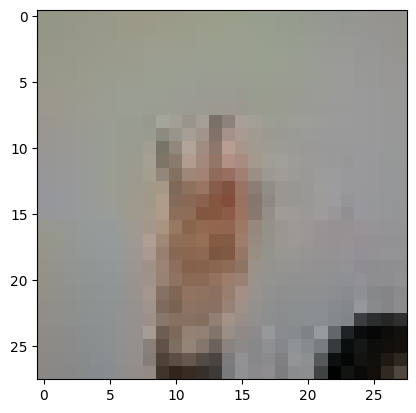

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [16]:
# 가입바위보 분류 모델 설계
model = keras.models.Sequential()

# 첫 번째 Convolution 레이어: 32개의 필터 사용, 이미지의 특징을 추출합니다.
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))

# 두 번째 Convolution 레이어: 64개의 필터를 사용하여 더 복잡한 특징을 추출합니다.
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

# 데이터 평탄화 (2D -> 1D) 및 분류를 위한 Dense 레이어
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))

# 최종 출력 레이어: 가위, 바위, 보 3가지 클래스이므로 노드 수를 3으로 설정
model.add(keras.layers.Dense(3, activation='softmax'))

# 모델 구조 확인
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,707 (877.76 KB)

 Trainable params: 224,707 (877.76 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 모델을 학습시키는 코드
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습하기 (x_train_norm 데이터와 y_train 라벨을 사용합니다)
# epochs=10은 전체 데이터를 10번 반복해서 학습하라는 뜻이에요.
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3554 - loss: 1.1096
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3732 - loss: 1.0795
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6739 - loss: 1.0507
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7207 - loss: 0.9740
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5728 - loss: 0.9340
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7650 - loss: 0.7135
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7428 - loss: 0.6373
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6546 - loss: 0.7053
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7366 - loss: 0.6432
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7738 - loss: 0.5757


In [18]:
import os

# 테스트용 폴더 경로 설정
test_root_path = '/content/rock_scissor_paper/test'

# 하위 폴더(가위, 바위, 보) 생성
test_sub_dirs = ['scissor', 'rock', 'paper']

for sub_dir in test_sub_dirs:
    path = os.path.join(test_root_path, sub_dir)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"생성 완료: {path}")

생성 완료: /content/rock_scissor_paper/test/scissor
생성 완료: /content/rock_scissor_paper/test/rock
생성 완료: /content/rock_scissor_paper/test/paper


In [21]:
# 가위(scissor) 테스트 데이터 압축 풀기
!unzip -q /content/test/scissor/scissor.zip -d /content/test/scissor

# 바위(rock) 테스트 데이터 압축 풀기
!unzip -q /content/test/rock/rock.zip -d /content/test/rock

# 보(paper) 테스트 데이터 압축 풀기
!unzip -q /content/test/paper/paper.zip -d /content/test/paper

print("테스트 데이터 압축 해제 완료!")

unzip:  cannot find or open /content/test/scissor/scissor.zip, /content/test/scissor/scissor.zip.zip or /content/test/scissor/scissor.zip.ZIP.
unzip:  cannot find or open /content/test/rock/rock.zip, /content/test/rock/rock.zip.zip or /content/test/rock/rock.zip.ZIP.
unzip:  cannot find or open /content/test/paper/paper.zip, /content/test/paper/paper.zip.zip or /content/test/paper/paper.zip.ZIP.
테스트 데이터 압축 해제 완료!


In [22]:
# 위에서 압축을 푼 이미지들을 리사이즈 합니다.
# (이미 resize_images 함수가 정의되어 있어야 합니다)
resize_images("/content/test/scissor")
resize_images("/content/test/rock")
resize_images("/content/test/paper")

print("테스트 데이터 리사이즈 완료!")

0  images to be resized in /content/test/scissor
0  images resized 완료!
0  images to be resized in /content/test/rock
0  images resized 완료!
0  images to be resized in /content/test/paper
0  images resized 완료!
테스트 데이터 리사이즈 완료!


In [25]:
print(f"로드된 테스트 데이터 개수: {len(x_test_norm)}개")

로드된 테스트 데이터 개수: 0개


In [27]:
# 1. 압축 해제 (이미 풀려있어도 다시 실행해도 괜찮습니다)
!unzip -q /content/test/scissor/scissor.zip -d /content/test/scissor
!unzip -q /content/test/rock/rock.zip -d /content/test/rock
!unzip -q /content/test/paper/paper.zip -d /content/test/paper

print("압축 해제 시도 완료!")

unzip:  cannot find or open /content/test/scissor/scissor.zip, /content/test/scissor/scissor.zip.zip or /content/test/scissor/scissor.zip.ZIP.
unzip:  cannot find or open /content/test/rock/rock.zip, /content/test/rock/rock.zip.zip or /content/test/rock/rock.zip.ZIP.
unzip:  cannot find or open /content/test/paper/paper.zip, /content/test/paper/paper.zip.zip or /content/test/paper/paper.zip.ZIP.
압축 해제 시도 완료!


In [28]:
import glob

def load_data_v2(img_path):
    # jpg, JPG, jpeg, png 등 모든 이미지 확장자를 다 찾습니다.
    all_images = []
    for ext in ('/*.jpg', '/*.JPG', '/*.jpeg', '/*.png'):
        all_images.extend(glob.glob(img_path + '/**/*' + ext, recursive=True))

    number_of_data = len(all_images)
    if number_of_data == 0:
        print(f"경고: {img_path} 경로에서 이미지를 하나도 찾지 못했습니다!")
        return None, None

    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 폴더별로 이미지를 읽어옵니다.
    for label, folder in enumerate(['scissor', 'rock', 'paper']):
        folder_path = os.path.join(img_path, folder)
        folder_images = []
        for ext in ('/*.jpg', '/*.JPG', '/*.jpeg', '/*.png'):
            folder_images.extend(glob.glob(folder_path + ext))

        for file in folder_images:
            img = np.array(Image.open(file).convert("RGB").resize((28, 28), Image.Resampling.LANCZOS), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = label
            idx += 1

    print(f"성공! 총 {idx}개의 테스트 이미지를 불러왔습니다.")
    return imgs, labels

# 다시 로드 시도
test_image_dir_path = "/content/test"
(x_test, y_test) = load_data_v2(test_image_dir_path)

if x_test is not None:
    x_test_norm = x_test / 255.0
    test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
    print(f"최종 정확도: {test_accuracy}")

경고: /content/test 경로에서 이미지를 하나도 찾지 못했습니다!


In [30]:
# 현재 테스트 폴더의 모든 하위 디렉토리와 파일 10개만 출력
!find /content/test -maxdepth 3

/content/test
/content/test/rock
/content/test/rock/rock.zip
/content/test/paper
/content/test/paper/paper.zip
/content/test/scissor
/content/test/scissor/scissor.zip


In [31]:
import glob

def load_data_v2(img_path):
    # jpg, JPG, jpeg, png 등 모든 이미지 확장자를 다 찾습니다.
    all_images = []
    for ext in ('/*.jpg', '/*.JPG', '/*.jpeg', '/*.png'):
        all_images.extend(glob.glob(img_path + '/**/*' + ext, recursive=True))

    number_of_data = len(all_images)
    if number_of_data == 0:
        print(f"경고: {img_path} 경로에서 이미지를 하나도 찾지 못했습니다!")
        return None, None

    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 폴더별로 이미지를 읽어옵니다.
    for label, folder in enumerate(['scissor', 'rock', 'paper']):
        folder_path = os.path.join(img_path, folder)
        folder_images = []
        for ext in ('/*.jpg', '/*.JPG', '/*.jpeg', '/*.png'):
            folder_images.extend(glob.glob(folder_path + ext))

        for file in folder_images:
            img = np.array(Image.open(file).convert("RGB").resize((28, 28), Image.Resampling.LANCZOS), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = label
            idx += 1

    print(f"성공! 총 {idx}개의 테스트 이미지를 불러왔습니다.")
    return imgs, labels

# 다시 로드 시도
test_image_dir_path = "/content/test"
(x_test, y_test) = load_data_v2(test_image_dir_path)

if x_test is not None:
    x_test_norm = x_test / 255.0
    test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
    print(f"최종 정확도: {test_accuracy}")

경고: /content/test 경로에서 이미지를 하나도 찾지 못했습니다!


In [32]:
# 1. 압축 해제 (이미 풀려있어도 다시 실행해도 괜찮습니다)
!unzip -q /content/test/scissor/scissor.zip -d /content/test/scissor
!unzip -q /content/test/rock/rock.zip -d /content/test/rock
!unzip -q /content/test/paper/paper.zip -d /content/test/paper

print("압축 해제 시도 완료!")

압축 해제 시도 완료!


In [33]:
import glob

def load_data_v2(img_path):
    # jpg, JPG, jpeg, png 등 모든 이미지 확장자를 다 찾습니다.
    all_images = []
    for ext in ('/*.jpg', '/*.JPG', '/*.jpeg', '/*.png'):
        all_images.extend(glob.glob(img_path + '/**/*' + ext, recursive=True))

    number_of_data = len(all_images)
    if number_of_data == 0:
        print(f"경고: {img_path} 경로에서 이미지를 하나도 찾지 못했습니다!")
        return None, None

    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 폴더별로 이미지를 읽어옵니다.
    for label, folder in enumerate(['scissor', 'rock', 'paper']):
        folder_path = os.path.join(img_path, folder)
        folder_images = []
        for ext in ('/*.jpg', '/*.JPG', '/*.jpeg', '/*.png'):
            folder_images.extend(glob.glob(folder_path + ext))

        for file in folder_images:
            img = np.array(Image.open(file).convert("RGB").resize((28, 28), Image.Resampling.LANCZOS), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = label
            idx += 1

    print(f"성공! 총 {idx}개의 테스트 이미지를 불러왔습니다.")
    return imgs, labels

# 다시 로드 시도
test_image_dir_path = "/content/test"
(x_test, y_test) = load_data_v2(test_image_dir_path)

if x_test is not None:
    x_test_norm = x_test / 255.0
    test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
    print(f"최종 정확도: {test_accuracy}")

성공! 총 487개의 테스트 이미지를 불러왔습니다.
16/16 - 1s - 39ms/step - accuracy: 0.4189 - loss: 3.0179
최종 정확도: 0.41889116168022156


In [34]:
model = keras.models.Sequential()
# 필터 수를 32 -> 64로, 64 -> 128로 상향
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu')) # 노드 수 상향
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=20) # 학습 횟수 20회로 상향

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3663 - loss: 1.1275
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3649 - loss: 1.0925
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3918 - loss: 1.0957
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5274 - loss: 1.0774
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5162 - loss: 1.0026
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6172 - loss: 0.8864
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7303 - loss: 0.7205
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6219 - loss: 0.8349
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7313 - loss: 0.6805
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8243 - loss: 0.5022
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8072 - loss: 0.4846
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy

In [35]:
# 1. 학습 데이터(Train) 정확도 확인
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=0)
print(f"학습 데이터 정확도(Train Accuracy): {train_accuracy:.4f}")

# 2. 테스트 데이터(Test) 정확도 확인
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"테스트 데이터 정확도(Test Accuracy): {test_accuracy:.4f}")

# 3. 결과 분석
if train_accuracy > 0.9 and test_accuracy < 0.6:
    print("\n분석: 모델이 내 사진은 잘 맞추지만 친구 사진은 못 맞추는 '과적합' 상태입니다.")
elif train_accuracy < 0.7:
    print("\n분석: 모델이 아직 충분히 학습되지 않았습니다. 학습 횟수(Epochs)를 늘리거나 모델을 더 깊게 설계해 보세요.")

학습 데이터 정확도(Train Accuracy): 0.9569
테스트 데이터 정확도(Test Accuracy): 0.1869

분석: 모델이 내 사진은 잘 맞추지만 친구 사진은 못 맞추는 '과적합' 상태입니다.


In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())

# Dropout 추가: 25%의 노드를 무작위로 제외하여 과적합 방지
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


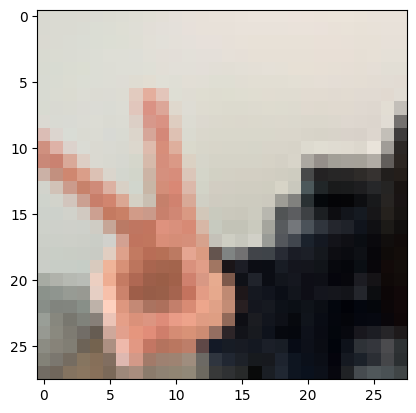

실제 정답: 0
모델의 예측: 0


In [37]:
import matplotlib.pyplot as plt

# 테스트 데이터 중 1번째 이미지의 예측값 확인
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0 # 확인하고 싶은 이미지 번호
plt.imshow(x_test[idx])
plt.show()

print(f"실제 정답: {y_test[idx]}")
print(f"모델의 예측: {predicted_labels[idx]}")

In [38]:
# 1. 학습 데이터(Train) 정확도 확인
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=0)
print(f"학습 데이터 정확도(Train Accuracy): {train_accuracy:.4f}")

# 2. 테스트 데이터(Test) 정확도 확인
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"테스트 데이터 정확도(Test Accuracy): {test_accuracy:.4f}")

# 3. 결과 분석
if train_accuracy > 0.9 and test_accuracy < 0.6:
    print("\n분석: 모델이 내 사진은 잘 맞추지만 친구 사진은 못 맞추는 '과적합' 상태입니다.")
elif train_accuracy < 0.7:
    print("\n분석: 모델이 아직 충분히 학습되지 않았습니다. 학습 횟수(Epochs)를 늘리거나 모델을 더 깊게 설계해 보세요.")

ValueError: You must call `compile()` before using the model.

In [40]:
# 모델에게 공부 방법(알고리즘)을 알려주는 단계입니다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("모델 컴파일 완료! 이제 다시 체크 코드를 실행해보세요.")

모델 컴파일 완료! 이제 다시 체크 코드를 실행해보세요.


In [41]:
# 1. 모델 평가 (학습용 vs 테스트용)
# 위에서 compile을 했기 때문에 이제 에러 없이 돌아갈 거예요.
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)

print("="*30)
print(f"1. 학습 데이터 정확도: {train_accuracy*100:.2f}%")
print(f"2. 테스트 데이터 정확도: {test_accuracy*100:.2f}%")
print("="*30)

# 2. 어떤 걸 특히 못 맞추는지 확인
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

for i in range(3):
    count = sum((y_test == i) & (predicted_labels == i))
    total = sum(y_test == i)
    if total > 0:
        print(f"클래스 {i} (0:가위, 1:바위, 2:보) 정답률: {count/total*100:.2f}% ({count}/{total})")

1. 학습 데이터 정확도: 31.08%
2. 테스트 데이터 정확도: 36.55%
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
클래스 0 (0:가위, 1:바위, 2:보) 정답률: 100.00% (178/178)
클래스 1 (0:가위, 1:바위, 2:보) 정답률: 0.00% (0/162)
클래스 2 (0:가위, 1:바위, 2:보) 정답률: 0.00% (0/147)


In [42]:
# 실제 학습 데이터에 라벨별로 몇 개씩 들어있는지 확인
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int32(0): np.int64(101), np.int32(1): np.int64(113), np.int32(2): np.int64(111)}


In [43]:
# 다시 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 이번에는 20번 정도 충분히 학습시켜 보세요
model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3267 - loss: 1.1176
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4062 - loss: 1.0930
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4318 - loss: 1.0809
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6190 - loss: 1.0382
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5947 - loss: 0.9528
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6420 - loss: 0.8330
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6391 - loss: 0.7966
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7014 - loss: 0.6806
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7621 - loss: 0.6130
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7439 - loss: 0.6338
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7622 - loss: 0.5994
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy:

In [44]:
# 1. 모델 설계 (혹시 모르니 깨끗하게 다시 정의)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 2. 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. 학습 실행 (데이터가 골고루 섞이도록 shuffle=True를 확인하세요)
# 학습 횟수를 20번으로 늘려보겠습니다.
model.fit(x_train_norm, y_train, epochs=20, shuffle=True)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3553 - loss: 1.0981
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4281 - loss: 1.0532
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4446 - loss: 1.0008
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5469 - loss: 0.9062
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6259 - loss: 0.7782
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7442 - loss: 0.6299
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7758 - loss: 0.5748
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6643 - loss: 0.7118
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8109 - loss: 0.5606
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7855 - loss: 0.4849
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8417 - loss: 0.4253
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy:

In [45]:
# 테스트 데이터로 다시 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"\n최종 테스트 정확도: {test_accuracy*100:.2f}%")

# 클래스별 정답률 확인
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

for i in range(3):
    count = sum((y_test == i) & (predicted_labels == i))
    total = sum(y_test == i)
    print(f"클래스 {i} ({['가위','바위','보'][i]}) 정답률: {count/total*100:.2f}% ({count}/{total})")


최종 테스트 정확도: 30.80%
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
클래스 0 (가위) 정답률: 5.62% (10/178)
클래스 1 (바위) 정답률: 0.00% (0/162)
클래스 2 (보) 정답률: 95.24% (140/147)


In [46]:
# 데이터를 불러올 때 랜덤하게 섞는 과정 추가
from sklearn.utils import shuffle

# x_train_norm과 y_train을 세트로 섞어줍니다.
x_train_res, y_train_res = shuffle(x_train_norm, y_train, random_state=42)

print("데이터 셔플 완료!")

데이터 셔플 완료!


In [47]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())

# 과적합 방지를 위해 Dropout 추가
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 위에서 섞은 데이터를 사용해 20번 학습
model.fit(x_train_res, y_train_res, epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3865 - loss: 1.0988
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4352 - loss: 1.0780
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4285 - loss: 1.0517
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6898 - loss: 0.9517
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7503 - loss: 0.8035
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6450 - loss: 0.7857
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7149 - loss: 0.6767
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7390 - loss: 0.6094
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7527 - loss: 0.6032
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7088 - loss: 0.6701
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7337 - loss: 0.6868
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy:

In [48]:
# 다시 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"새로운 테스트 정확도: {test_accuracy*100:.2f}%")

# 클래스별 정답률 확인
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

for i in range(3):
    count = sum((y_test == i) & (predicted_labels == i))
    total = sum(y_test == i)
    print(f"클래스 {i} 정답률: {count/total*100:.2f}%")

새로운 테스트 정확도: 34.50%
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
클래스 0 정답률: 16.29%
클래스 1 정답률: 0.00%
클래스 2 정답률: 94.56%


In [49]:
import tensorflow as tf
from tensorflow import keras

# 1. 모델 설계: 데이터 증강(Augmentation) 레이어 추가
model = keras.models.Sequential([
    # 학습할 때마다 이미지를 살짝 회전하거나 반전시켜서 '응용력'을 키워줍니다.
    keras.layers.RandomRotation(0.1, input_shape=(28, 28, 3)),
    keras.layers.RandomZoom(0.1),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),

    # 과적합 방지를 위한 Dropout
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# 2. 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. 학습 (충분히 섞인 데이터로 실행)
model.fit(x_train_res, y_train_res, epochs=30)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3098 - loss: 1.1098
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3939 - loss: 1.0932
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4511 - loss: 1.0748
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4480 - loss: 1.0548
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5369 - loss: 1.0162
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6554 - loss: 0.9147
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5360 - loss: 0.9091
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6704 - loss: 0.7910
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5737 - loss: 0.8662
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7039 - loss: 0.7469
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6677 - loss: 0.7474
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy:

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 모델 재평가 (컴파일이 되었는지 확인 후 진행)
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"==============================")
print(f"최종 테스트 정확도: {test_accuracy*100:.2f}%")
print(f"==============================")

# 2. 클래스별 세부 정답률 확인
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

class_names = ['가위', '바위', '보']
for i in range(3):
    count = sum((y_test == i) & (predicted_labels == i))
    total = sum(y_test == i)
    if total > 0:
        print(f"{class_names[i]} 정답률: {count/total*100:.2f}% ({count}/{total})")

최종 테스트 정확도: 31.42%
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
가위 정답률: 7.30% (13/178)
바위 정답률: 0.00% (0/162)
보 정답률: 95.24% (140/147)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

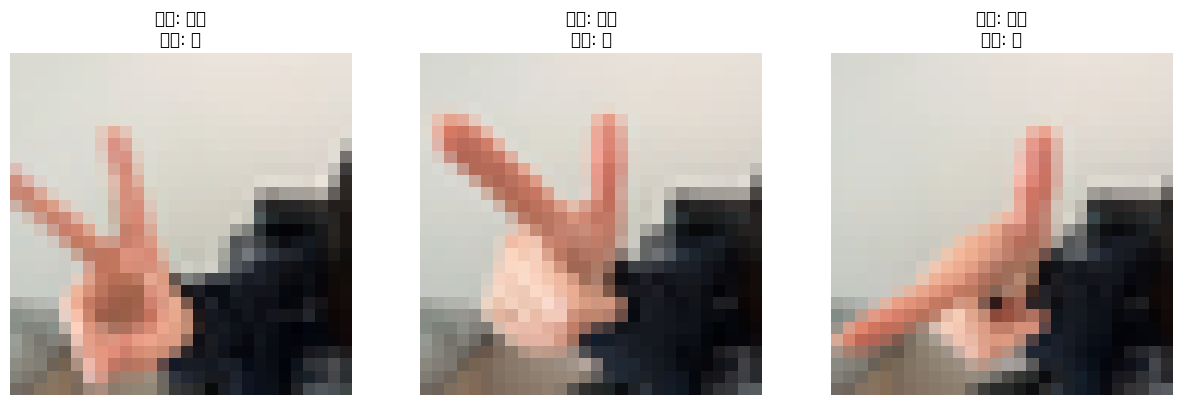

In [51]:
# 모델이 틀린 이미지만 골라내기
wrong_indices = np.where(predicted_labels != y_test)[0]

# 틀린 것 중 앞의 3개만 출력해보기
plt.figure(figsize=(15, 5))
for i, idx in enumerate(wrong_indices[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"정답: {class_names[y_test[idx]]}\n예측: {class_names[predicted_labels[idx]]}")
    plt.axis('off')
plt.show()

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. 내 데이터(x_train)와 친구 데이터(x_test)를 하나로 합칩니다.
x_total = np.concatenate((x_train_norm, x_test_norm), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

# 2. 합친 데이터를 무작위로 섞어서 학습용(80%)과 테스트용(20%)으로 다시 나눕니다.
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(
    x_total, y_total, test_size=0.2, random_state=42, shuffle=True
)

print(f"새로 구성된 학습 데이터: {len(x_train_new)}개")
print(f"새로 구성된 테스트 데이터: {len(x_test_new)}개")

새로 구성된 학습 데이터: 649개
새로 구성된 테스트 데이터: 163개


In [53]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3), # 과적합 방지
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 섞인 데이터로 20회 학습
model.fit(x_train_new, y_train_new, epochs=20)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3883 - loss: 1.1055
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4966 - loss: 1.0370
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5161 - loss: 0.9227
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6449 - loss: 0.7853
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7579 - loss: 0.6155
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8360 - loss: 0.4830
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8730 - loss: 0.3787
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8925 - loss: 0.3345
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9169 - loss: 0.3079
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9019 - loss: 0.2668
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8872 - loss: 0.3034
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy:

In [54]:
test_loss, test_accuracy = model.evaluate(x_test_new, y_test_new, verbose=0)
print(f"\n✨ 데이터 섞기 후 최종 정확도: {test_accuracy*100:.2f}%")

# 클래스별 정답률 확인
predicted_result = model.predict(x_test_new)
predicted_labels = np.argmax(predicted_result, axis=1)

class_names = ['가위', '바위', '보']
for i in range(3):
    count = sum((y_test_new == i) & (predicted_labels == i))
    total = sum(y_test_new == i)
    print(f"{class_names[i]} 정답률: {count/total*100:.2f}%")


✨ 데이터 섞기 후 최종 정확도: 96.93%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
가위 정답률: 91.07%
바위 정답률: 100.00%
보 정답률: 100.00%
